<a href="https://colab.research.google.com/github/sanchita-03/project/blob/main/Mielage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Mielage Prediction - Regression Analysis**



## **Objective** **:**


1.   Develop a regression model: The main objective is to build an accurate and reliable regression model that can predict the mileage (fuel efficiency) of vehicles based on their features. This involves selecting appropriate features, identifying the target variable, and choosing a suitable regression algorithm.
2.   Improve fuel efficiency estimation: The project aims to contribute to the improvement of fuel efficiency estimation in the automotive industry. By accurately predicting mileage, the model can help vehicle manufacturers and consumers make informed decisions about fuel consumption and energy efficiency.
3.    Evaluate model performance: Assess the accuracy and reliability of the regression model by evaluating its performance metrics, such as mean squared error (MSE), root mean squared error (RMSE), coefficient of determination (R-squared), or other relevant metrics. This objective ensures that the model meets the desired level of prediction accuracy.
4.    Provide actionable insights: The project aims to provide actionable insights and recommendations based on the regression analysis. These insights can be used by manufacturers, policymakers, and consumers to make informed decisions regarding vehicle purchasing, maintenance, and driving habits to optimize fuel efficiency and reduce environmental impact.







## **Data Source** **:**
"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

Attribute Information:

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower: continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

# **import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **import data**

In [2]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
data.shape

(398, 9)

In [5]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Remove missing Value**

In [8]:
data=data.dropna()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# **Data Visualization**

In [10]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

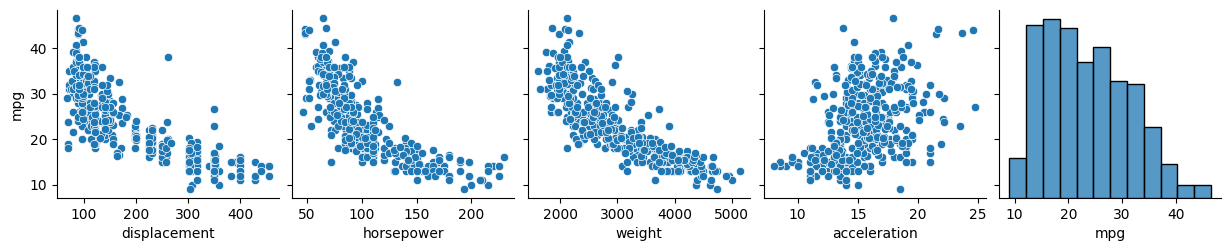

In [11]:
sns.pairplot(data,x_vars=['displacement','horsepower', 'weight','acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

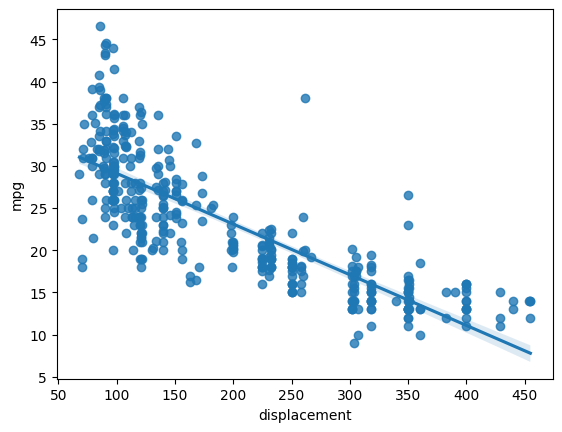

In [12]:
sns.regplot(x='displacement',y='mpg',data=data)

# **Define Target Variable y and feature Variable x**

In [13]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [14]:
y = data['mpg']

In [15]:
x =data[['displacement', 'horsepower', 'weight','acceleration']]

In [16]:
x.shape,y.shape

((392, 4), (392,))

In [17]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scalling the Data**

In [18]:
from sklearn.preprocessing import StandardScaler
model=StandardScaler()

In [19]:
model.fit_transform(x)

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [20]:
pd.DataFrame(x).describe()

,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000
mean,194.411990,104.469388,2977.584184,15.541327
std,104.644004,38.491160,849.402560,2.758864
min,68.000000,46.000000,1613.000000,8.000000
25%,105.000000,75.000000,2225.250000,13.775000
50%,151.000000,93.500000,2803.500000,15.500000
75%,275.750000,126.000000,3614.750000,17.025000
max,455.000000,230.000000,5140.000000,24.800000


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.7,random_state=2529)

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
lr.intercept_

44.00934827526879

In [25]:
lr.coef_

array([-0.01024643, -0.01668317, -0.00610645,  0.09710601])

# **Predict test data**

In [26]:
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([18.83232615, 14.67689764, 13.90916105, 23.48706843, 30.25543552,
       23.46671071, 27.28163576, 24.60121655, 14.40764431, 10.81692289,
       24.30874146, 27.9134718 , 31.87135668, 31.42289874, 17.69562279,
       19.09989244, 28.60563403, 32.67685665, 31.45063299, 27.35959705,
       18.46314382, 22.19920123, 26.2982957 , 33.03335117, 20.48801313,
        9.54351607, 22.40016431, 18.3349025 , 24.90567933, 17.72005616,
       23.00135022, 16.88953804, 10.57530881, 30.26775706, 20.13255834,
       29.29639211, 24.89285218, 21.37238187,  9.68643504, 12.73666785,
       20.95618571, 20.11237202,  6.42862798, 17.31748152, 22.17367358,
       29.47288305, 13.72946495, 25.84603835, 30.3260242 , 22.49617884,
       21.32125793, 16.21218023, 23.82532354, 30.39683971,  9.25868474,
       10.87274956, 28.51433586, 23.14656115, 20.00708585, 31.00621369,
       20.4572209 , 27.13086597, 22.2195037 , 13.80505274, 25.30799492,
       27.41913866, 15.02111221, 24.0510285 , 31.58339665, 14.71

# **Model Accuracy**

In [28]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score


In [29]:
mean_absolute_error(y_test,y_pred)

3.3564087099398763

In [30]:
mean_absolute_percentage_error(y_test,y_pred)

0.14970671967399582

In [31]:
r2_score(y_test,y_pred)

0.692328962494241

# **Polynomial Regression**

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [33]:
x_train2 = poly.fit_transform(x_train)

In [34]:
x_test2 = poly.fit_transform(x_test)

In [35]:
lr.fit(x_train2,y_train)

LinearRegression()

In [36]:
lr.intercept_

118.47076044589237

In [37]:
lr.coef_

array([ 1.15496746e-01, -6.10317561e-01, -2.76715217e-02, -3.07369408e+00,
        5.17727935e-04, -9.04155995e-06, -1.05800805e-02,  6.47202809e-05,
        1.41359693e-02,  1.25673240e-03])

In [38]:
y_pred_poly = lr.predict(x_test2)

In [39]:
y_pred_poly

array([16.7243993 , 14.86256069, 14.30095301, 27.73988653, 31.64416318,
       22.48130459, 25.83150991, 22.93845843, 14.11543931, 12.16514723,
       30.01495823, 28.63263655, 36.39820007, 34.1618376 , 18.95627178,
       18.39770967, 27.49173841, 35.69898835, 34.57509532, 27.18037121,
       17.07746259, 20.46915708, 24.67005151, 33.54201479, 19.05068157,
       19.02935463, 17.88470917, 16.74900702, 26.38381527, 25.26379781,
       20.60861828, 15.65266898, 25.44955048, 32.0902916 , 18.90105068,
       30.76418105, 22.31776585, 20.52471499, 12.51121227, 13.06289235,
       19.27588291, 18.55084395, 18.0953199 , 15.80371342, 20.5109621 ,
       31.23367382, 14.85458683, 24.29051124, 28.81550586, 20.31602397,
       19.96021747, 14.65862385, 22.61187134, 32.60156818, 12.58713704,
       14.31513118, 27.74879199, 19.86188629, 17.92286346, 33.54807316,
       19.27267425, 25.56033116, 21.26550284, 14.48380208, 22.18035393,
       25.54496435, 15.32077972, 22.60293191, 32.62783405, 14.67

# **Model Accuracy Poly**

In [40]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score
mean_absolute_error(y_test,y_pred_poly)

3.2054940687450317

In [41]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.14706619052516537

In [42]:
r2_score(y_test,y_pred_poly)

0.6842004879326445

## **Explanation** **:**



In the mileage prediction regression analysis project, the goal is to develop a regression model using Python that can accurately predict the fuel efficiency (mileage) of vehicles based on their features. Regression analysis is a statistical method used to estimate the relationships between variables, with the aim of predicting a continuous outcome variable.Python's extensive ecosystem of libraries, such as pandas, numpy, and scikit-learn, provides powerful tools for data manipulation, model training, and evaluation in regression analysis.